In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd

# libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# libraries to scale data
from sklearn.preprocessing import scale

# libraries for K-means clustering
from sklearn.cluster import KMeans

# libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# loading dataset
dat = pd.read_csv('Country-data.csv')
print(dat.shape)
dat.head()

(167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


### <font color=blue>Converting fields exports, imports and health from percentage to absolute values</font>

In [4]:
# Converting fields exports,imports and health from percentages to absolute values
dat['exports'] = dat['exports']*dat['gdpp']/100
dat['imports'] = dat['imports']*dat['gdpp']/100
dat['health'] = dat['health']*dat['gdpp']/100

In [5]:
print(dat.shape)
dat.head()

(167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
dat.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Checking NULL values
dat.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### <font color=red>No NULL values</font>

### <font color=blue>Exploratory Data Analysis</font>

In [8]:
# we need to find countries which are in dire need of aid.
# plotting bottom 10 countries in each field

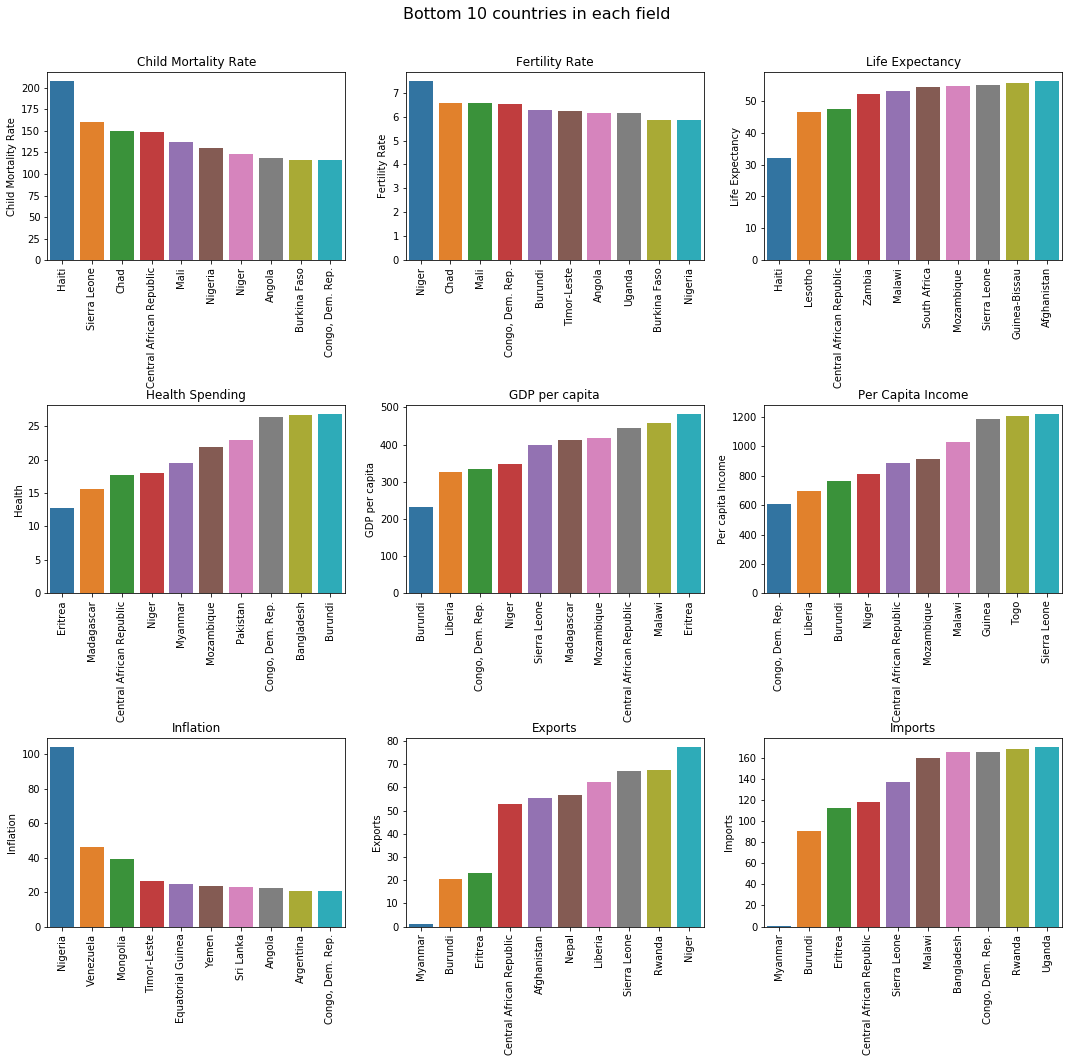

In [9]:
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.suptitle('Bottom 10 countries in each field', fontsize=16)

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
top10_child_mort = dat[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate',title='Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = dat[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate',title='Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
bottom10_life_expec = dat[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy',title='Life Expectancy')

# Health :Total health spending as %age of Total GDP.
bottom10_health = dat[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health',title='Health Spending')

# The GDP per capita : Calculated as the Total GDP divided by the total population.
bottom10_gdpp = dat[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita',title='GDP per capita')

# Per capita Income : Net income per person
bottom10_income = dat[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income',title='Per Capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP
top10_inflation = dat[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation',title='Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP
bottom10_exports = dat[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports',title='Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP
bottom10_imports = dat[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports',title='Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('eda')
plt.show()

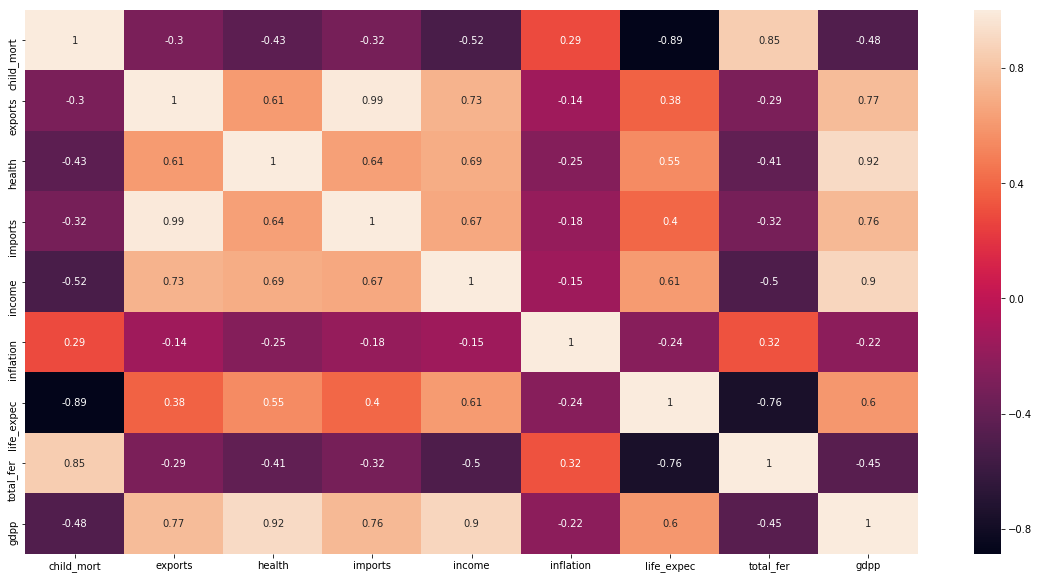

In [10]:
# checking correlation of dataset
plt.figure(figsize=(20,10))
sns.heatmap(dat.corr(),annot=True)
plt.show()

### <font color=red>Lot of correlated variables so usage of PCA is justified

### <font color=blue>Principal Component Analysis</font>

In [11]:
# final matrix can only have numeric columns hence dropping country column
dat_PCA = dat.drop('country', axis = 1)
dat_PCA.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [12]:
# scaling variables of different magnitude so that PCA can be applied
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat_scale = standard_scaler.fit_transform(dat_PCA)

C:\Users\asgarg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\asgarg\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
dat_scale

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [14]:
# importing PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [15]:
# applyign PCA
pca.fit(dat_scale)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [16]:
# list of PCA components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [17]:
# checking variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

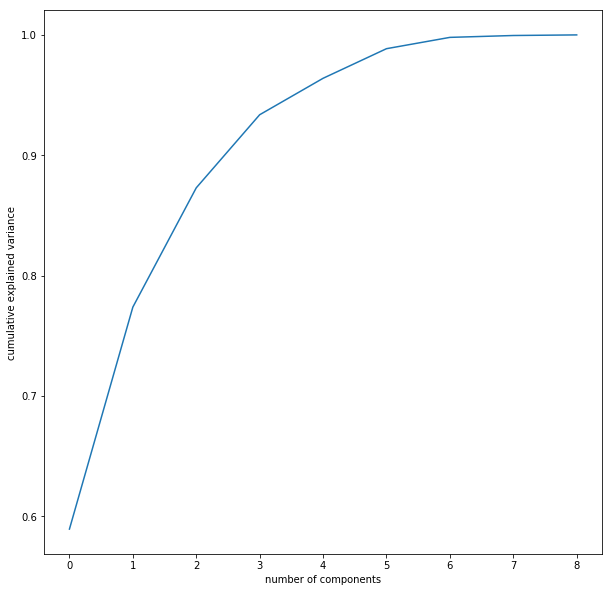

In [18]:
# Plotting scree plot
%matplotlib inline
fig = plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### <font color=red>More than 90% variance is explained by 3 components, so we will consider 3 components for our analysis</font>

In [19]:
# analysing how original variables are loaded against first three principal components
colnames = list(dat_PCA.columns)
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


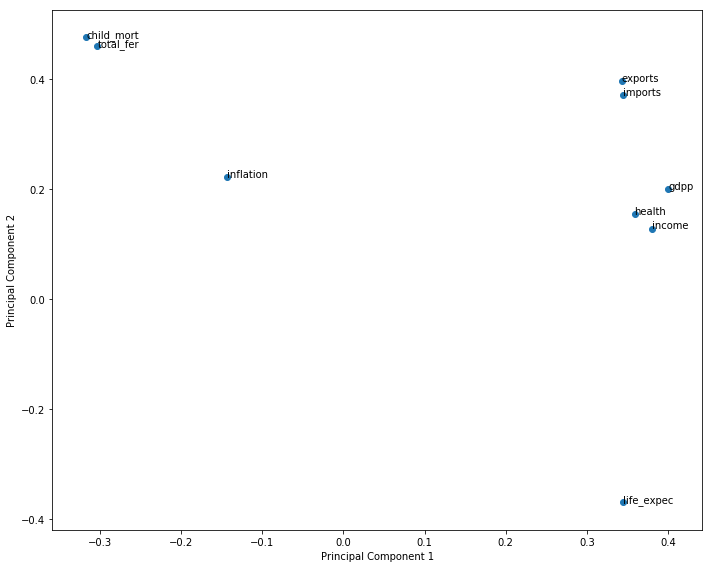

In [20]:
# plotting first and second Pricipal Component to visualise how they are loaded
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [21]:
# Dimensionality reduction using 3 Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 3)

In [22]:
# projecting original data on 3 principal components
df_pca = pca_final.fit_transform(dat_scale)
df_pca.shape

(167, 3)

In [23]:
df_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [24]:
# creating transpose for arranging columns properly
pc = np.transpose(df_pca)

In [25]:
# creating dataframe as per new principal components
rownames = list(dat['country'])
pcs_df_orig = pd.DataFrame({'Country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})

In [26]:
pcs_df_orig = pcs_df_orig.reset_index(drop = True)
pcs_df2 = pcs_df_orig.drop('Country',axis=1)

In [27]:
pcs_df2.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


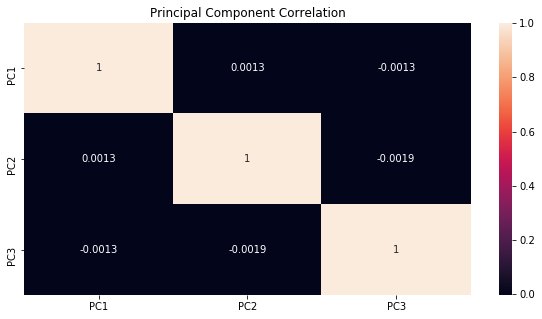

In [28]:
# plotting the correlation matrix for Principal Components
plt.figure(figsize=(10,5))
sns.heatmap(pcs_df2.corr(),annot=True)
plt.title('Principal Component Correlation')
plt.show()

### <font color=blue>Outlier Analysis before clustering</font>
outliers can be assigned to cluster later

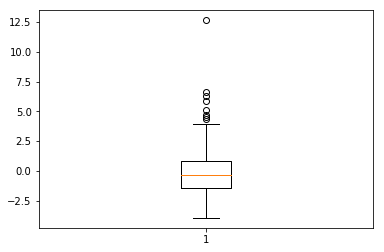

In [29]:
# outlier for PC1
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

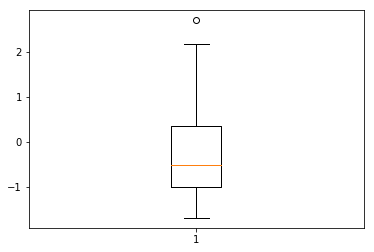

In [30]:
# outlier for PC2
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

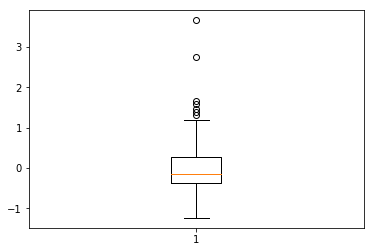

In [31]:
# outlier for PC3
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

In [32]:
# checking data after outlier
pcs_df2.shape

(119, 3)

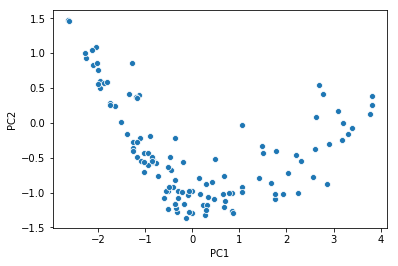

In [33]:
# checking spread of dataset for PC1 and PC2
sns.scatterplot(x=pcs_df2.PC1,y=pcs_df2.PC2)

### <font color=blue>Clustering</font>

In [34]:
# Calculating Hopkins statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
# Checking Hopkins measure
hopkins(pcs_df2)

0.8106070886408893

### <font color=red>since Hopkins score is greater than 0.5 so it has good tendency to form clusters</font>

In [36]:
dat3_1 = pcs_df2.copy()

### <font color=blue>K-Means Clustering</font>

In [37]:
# silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

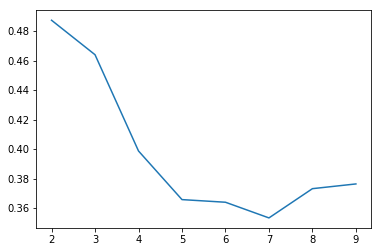

In [38]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### <font color=red>from above 3 looks good number for K means algorithm</font>

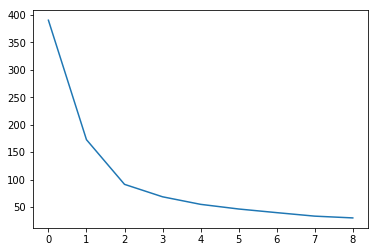

In [39]:
# elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

### <font color=red>from above we see 3 clusters looks good for K-Means algorithm, hence K=3 looks good to proceed</font>

### <font color=blue>K-Means using K=3</font>

In [40]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [41]:
dat4=pcs_df2.copy()
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2', 'PC3', 'ClusterID']
dat_km

,PC1,PC2,PC3,ClusterID
0,-2.637442,1.469038,-0.541359,2
1,-0.457626,-0.673301,0.961867,1
2,0.649849,-1.024374,-0.250103,1
3,-0.332692,-1.274517,0.176636,1
4,3.180362,-0.250785,-0.116877,0
5,3.815682,0.256083,-0.270495,0
6,-0.467515,-0.493492,0.603288,1
7,1.498752,-0.428907,-0.550238,0
8,1.470971,-0.326796,0.428412,0
9,-1.014199,-0.711808,-0.116989,1


In [42]:
dat_km['ClusterID'].value_counts()

1    61
2    31
0    27
Name: ClusterID, dtype: int64

### <font color=blue>Visualising PC1 & PC2</font>

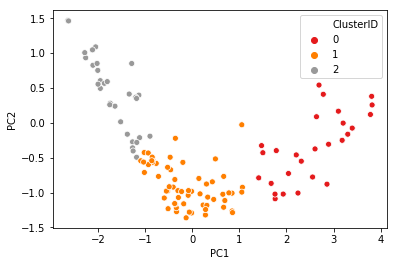

In [43]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km,palette="Set1")

### <font color=blue>Visualising PC1 & PC3</font>

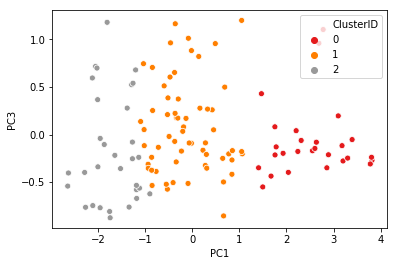

In [44]:
sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',data=dat_km,palette="Set1")

### <font color=blue>Visualising PC2 & PC3</font>

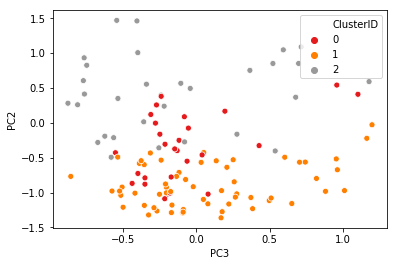

In [45]:
sns.scatterplot(x='PC3',y='PC2',hue='ClusterID',legend='full',data=dat_km,palette="Set1")

### <font color=blue>Merging clusters to main dataset</font>

In [46]:
temp = pd.merge(pcs_df_orig[['Country']],pcs_df2, left_index=True,right_index=True)
temp = temp.reset_index(drop = True)
# merging dataset to master dataset
dat5=pd.merge(temp[['Country']],dat_km, left_index=True,right_index=True)
dat_kmeans=pd.merge(dat,dat5, left_on='country', right_on='Country')
dat_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,-2.637442,1.469038,-0.541359,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,Australia,3.180362,-0.250785,-0.116877,0


In [47]:
# Dropping Principal Components
dat_kmeans=dat_kmeans.drop(['PC1','PC2','PC3','Country'],axis=1)
dat_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,0


### <font color=red>Cluster IDs allocated to each datapoint</font>

### <font color=blue>Hierarchical Clustering</font>

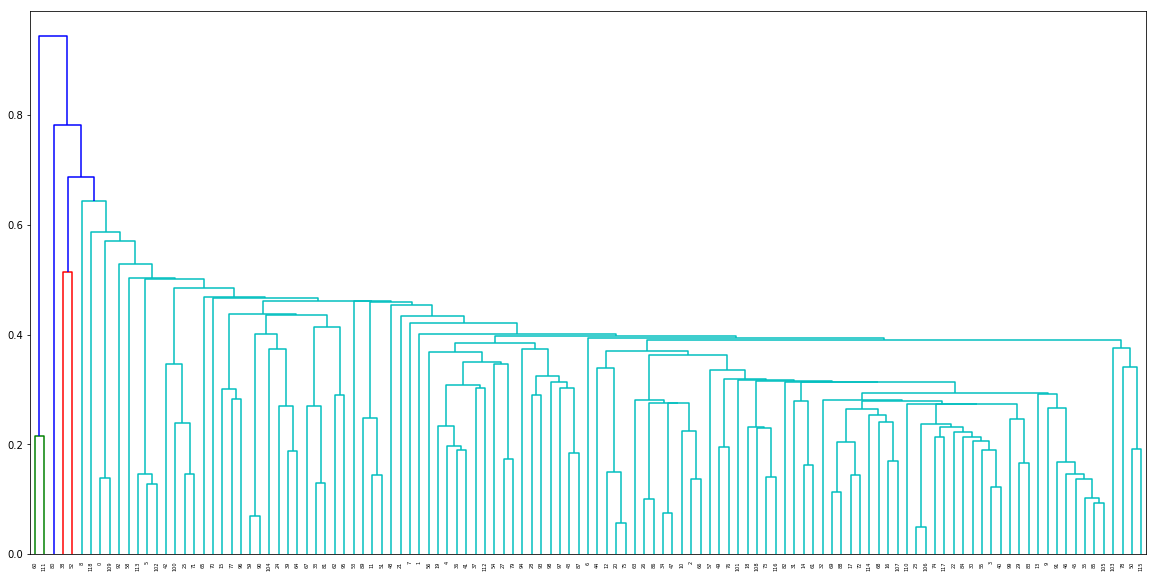

In [48]:
# Hierarchical clustering with Single Linkage
plt.figure(figsize=(20,10))
mergings = linkage(pcs_df2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

### <font color=red>Looking at Hierarchical Cluster with single linkage does not yield good clusters</font>
### <font color=blue>Analysing Hierarchical Cluster with complete linkage</font>

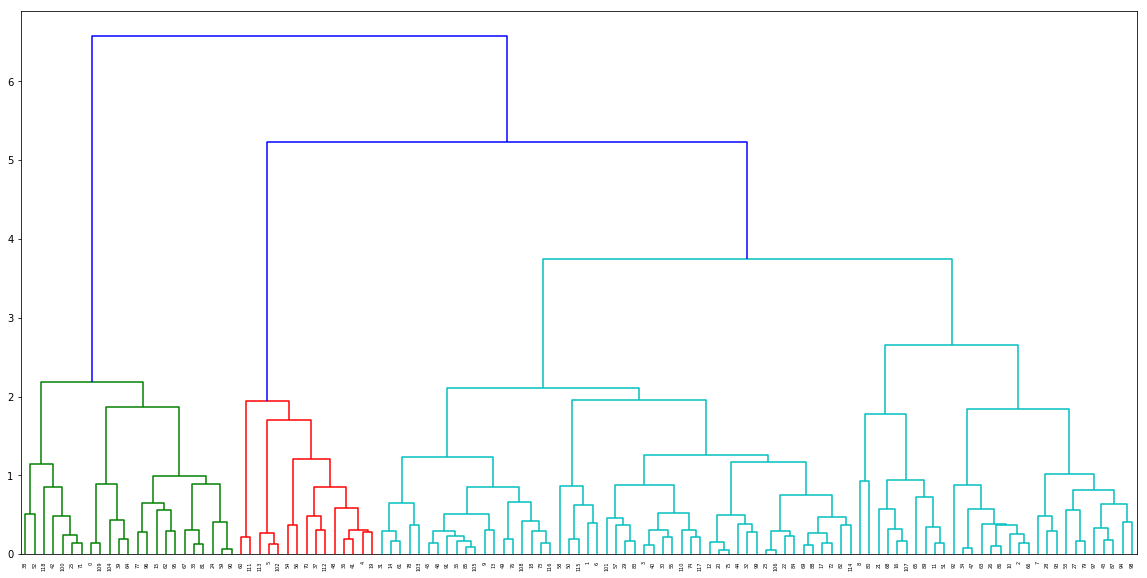

In [49]:
# Hierarchical clustering with Single Linkage
plt.figure(figsize=(20,10))
mergings = linkage(pcs_df2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### <font color=red>In above Hierarchical Clustering with complete linkage number of clusters 7 look decent to proceed with analysis</font>

In [50]:
# hierarchical clustering with 4 clusters
# reseting index of dataframe to make merging with clusterid streamlined
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 7).reshape(-1,))
dat3_hc = pd.concat([pcs_df2, clusterCut], axis=1)
dat3_hc.columns = ['PC1', 'PC2','PC3','ClusterID']

In [51]:
temp = pd.merge(pcs_df_orig[['Country']],pcs_df2, left_index=True,right_index=True)
temp = temp.reset_index(drop = True)
# merging dataset to master dataset
dat_temp=pd.merge(temp[['Country']],dat3_hc, left_index=True,right_index=True)
dat_hier=pd.merge(dat,dat_temp, left_on='country', right_on='Country')
dat_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,-2.637442,1.469038,-0.541359,0.0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,NaN,NaN,NaN,1.0
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,-0.457626,-0.673301,0.961867,2.0
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,Armenia,NaN,NaN,NaN,1.0
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,Australia,0.649849,-1.024374,-0.250103,3.0


In [52]:
dat_hier.drop(['PC1','PC2','PC3','Country'], axis=1, inplace=True)

In [53]:
dat_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1.0
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2.0
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1.0
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.0


### <font color=blue>Analysis of clusters</font>

### <font color=blue>Plotting clusters created by K-Means Clustering and Hierarchical Clustering</font>

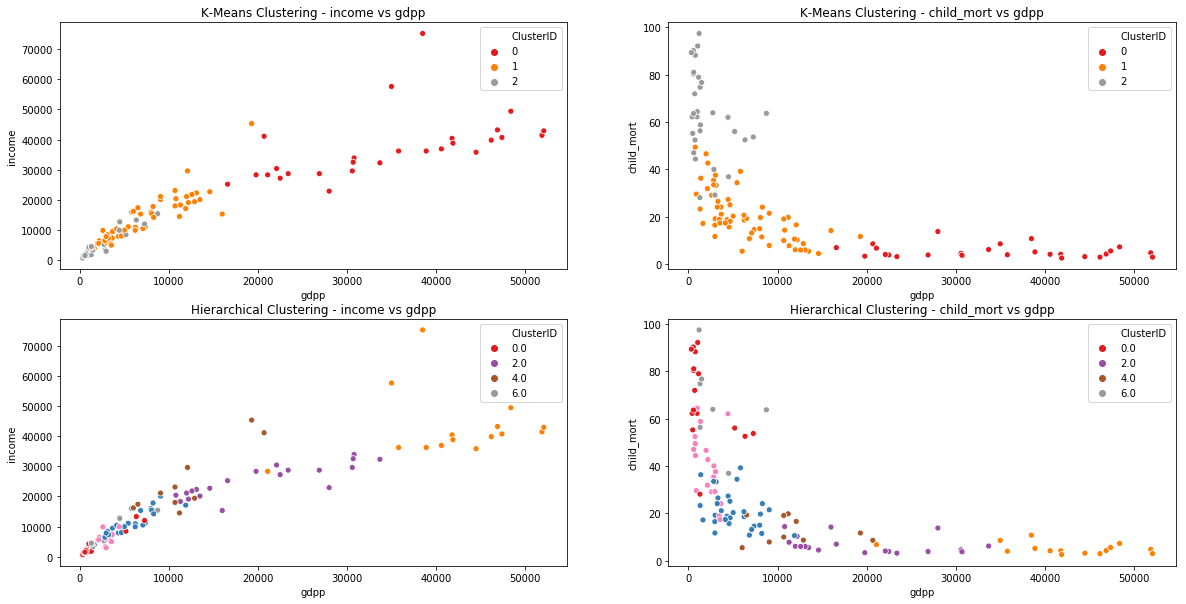

In [54]:
plt.figure(figsize=(20,10))

plt.subplot(221)
# plotting income and gdpp against clusters from K-Means to see the spread
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',data=dat_kmeans,palette="Set1")
plt.title("K-Means Clustering - income vs gdpp")

plt.subplot(222)
# plotting child_mort and gdpp against clusters from K-Means to see the spread
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',data=dat_kmeans,palette="Set1")
plt.title("K-Means Clustering - child_mort vs gdpp")

plt.subplot(223)
# plotting income and gdpp against clusters from Hierarchical Clustering to see the spread
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',data=dat_hier,palette="Set1")
plt.title("Hierarchical Clustering - income vs gdpp")

plt.subplot(224)
# plotting child_mort and gdpp against clusters from Hierarchical to see the spread
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',data=dat_hier,palette="Set1")
plt.title("Hierarchical Clustering - child_mort vs gdpp")

plt.show()

In [55]:
print(dat_kmeans['ClusterID'].value_counts())
dat_kmeans.groupby('ClusterID').mean()

1    61
2    31
0    27
Name: ClusterID, dtype: int64


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0,5.322222,14504.025926,3249.133704,13650.455556,37170.370370,2.204556,79.777778,1.749259,34696.296296
1,20.221311,3071.619836,406.979256,3160.474656,12796.557377,6.627721,73.208197,2.272295,6636.360656
2,63.651613,861.023623,128.778690,858.977519,4450.000000,9.736452,63.329032,4.111935,2072.161290


In [56]:
print(dat_hier['ClusterID'].value_counts())
dat_hier.groupby('ClusterID').mean()

1.0    32
2.0    20
5.0    19
0.0    16
3.0    15
4.0    10
6.0     7
Name: ClusterID, dtype: int64


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0.0,69.087500,594.807113,130.643663,785.041625,3715.625000,7.110000,60.950000,4.455000,1763.937500
1.0,21.168750,2050.952500,318.332219,2251.791250,10377.812500,7.038781,73.484375,2.228750,5098.125000
2.0,6.615000,9304.775000,1625.982000,9804.000000,25040.000000,0.774550,77.350000,1.666500,20060.000000
3.0,5.173333,17256.080000,4132.270000,15558.526667,42853.333333,2.817467,80.486667,1.774000,42066.666667
4.0,12.720000,5894.767000,643.571600,4552.337000,24570.000000,11.409000,74.830000,2.027000,11923.000000
5.0,40.047368,831.819922,120.702547,1139.599005,4935.789474,6.431579,68.363158,3.058421,2198.526316
6.0,67.085714,1547.557143,147.828571,961.131429,6788.571429,18.942857,64.957143,4.627143,3041.428571


### <font color=red>Based on analysis above considering columns 'child_mort', 'income' and 'gdpp' - Hierarchical Clustering looks better than K-Means. 7 clusters from Hierarchical clusters define countries better than 3 clusters from K-Means.</font>
    Cluster 0 from Hierarchical CLustering looks right good for our need. It has following values -
    Child Mortality - 69.087500
    income - 3715.62500
    gdpp - 1763.937500


### <font color=red>Our problem statement defines to find list of countries which are in dire need of aid based on gdpp, child_mort and income. To make up for outliers removed we can take cluster means of cluster as cut offs </font>

### <font color=blue>Binning - final list of countries in dire need of aid </font>

In [57]:
dat_final = dat[dat['child_mort']>=69.087500]
dat_final = dat_final[dat_final['income']<=3715.625000]
dat_final = dat_final[dat_final['gdpp']<=1763.937500]

In [58]:
dat_final.shape

(28, 10)

In [59]:
dat_final.sort_values(by='gdpp',ascending = True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.640,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.100,53.1,5.31,459
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.180,58.7,4.87,488
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547


In [60]:
# list of countries in need of aid
list(dat_final['country'])

['Afghanistan',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 "Cote d'Ivoire",
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Lesotho',
 'Liberia',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Niger',
 'Sierra Leone',
 'Sudan',
 'Tanzania',
 'Togo',
 'Uganda',
 'Zambia']

### <font color=red>Countries in need of aid are </font>
     'Afghanistan','Benin','Burkina Faso','Burundi','Cameroon',     
     'Central African Republic','Chad','Comoros','Congo, Dem. Rep.',
     "Cote d'Ivoire",'Gambia','Ghana','Guinea','Guinea-Bissau',     
     'Haiti','Lesotho','Liberia','Malawi','Mali','Mauritania','Mozambique',
     'Niger','Sierra Leone','Sudan','Tanzania','Togo','Uganda','Zambia'